In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

     |████████████████████████████████| 2.1 MB 25.5 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.0 MB/s eta 0:00:00:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.4.0
    Uninstalling setuptools-59.4.0:
      Successfully uninstalled setuptools-59.4.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 20.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 165.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.6/285.6 kB 221.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 152.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 225.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 159.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from autogluon.tabular import TabularDataset,TabularPredictor

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
bike_df=pd.read_csv('bike_sharing_daily.csv')

In [8]:
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [9]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [10]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [12]:
#train/evaluate multiple regression using autogluon
bike_df.drop(['registered','cnt','instant','dteday'],inplace=True,axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(bike_df,random_state=0,test_size=0.2)

In [14]:
#Autogluon is modularised into text(NLP),image(DL) and tabular dataset(ML)
#time_limit is necessary to define otherwise it will keep running
from autogluon.tabular import TabularDataset, TabularPredictor
predictor=TabularPredictor(label='casual',problem_type='regression',eval_metric='r2').fit(train_data=X_train,time_limit=200,presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20221201_053202/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20221201_053202/"
AutoGluon Version:  0.6.0
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Sep 29 01:01:23 UTC 2022
Train Data Rows:    584
Train Data Columns: 10
Label Column: casual
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3045.37 MB
	Train Data (Original)  Memory Usage: 0.05 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note:

In [15]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.851747       0.243996  85.416333                0.000593           0.419792            2       True         12
1          CatBoost_BAG_L1   0.844732       0.008168  16.747093                0.008168          16.747093            1       True          6
2        LightGBMXT_BAG_L1   0.842214       0.054212  12.882734                0.054212          12.882734            1       True          3
3    NeuralNetTorch_BAG_L1   0.827885       0.067055  21.427611                0.067055          21.427611            1       True         10
4          LightGBM_BAG_L1   0.824676       0.030423  12.097543                0.030423          12.097543            1       True          4
5     ExtraTreesMSE_BAG_L1   0.819772       0.116194   0.812938                0.11619

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6565100715854191,
  'KNeighborsDist_BAG_L1': 0.6093214275254359,
  'LightGBMXT_BAG_L1': 0.8422137032313775,
  'LightGBM_BAG_L1': 0.8246758946365543,
  'RandomForestMSE_BAG_L1': 0.8049868115467973,
  'CatBoost_BAG_L1': 0.8447321188316947,
  'ExtraTreesMSE_BAG_L1': 0

In [16]:
predictor.leaderboard()

                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.851747       0.243996  85.416333                0.000593           0.419792            2       True         12
1          CatBoost_BAG_L1   0.844732       0.008168  16.747093                0.008168          16.747093            1       True          6
2        LightGBMXT_BAG_L1   0.842214       0.054212  12.882734                0.054212          12.882734            1       True          3
3    NeuralNetTorch_BAG_L1   0.827885       0.067055  21.427611                0.067055          21.427611            1       True         10
4          LightGBM_BAG_L1   0.824676       0.030423  12.097543                0.030423          12.097543            1       True          4
5     ExtraTreesMSE_BAG_L1   0.819772       0.116194   0.812938                0.116194           0.812938            1       True          7
6     

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.851747,0.243996,85.416333,0.000593,0.419792,2,True,12
1,CatBoost_BAG_L1,0.844732,0.008168,16.747093,0.008168,16.747093,1,True,6
2,LightGBMXT_BAG_L1,0.842214,0.054212,12.882734,0.054212,12.882734,1,True,3
3,NeuralNetTorch_BAG_L1,0.827885,0.067055,21.427611,0.067055,21.427611,1,True,10
4,LightGBM_BAG_L1,0.824676,0.030423,12.097543,0.030423,12.097543,1,True,4
5,ExtraTreesMSE_BAG_L1,0.819772,0.116194,0.812938,0.116194,0.812938,1,True,7
6,LightGBMLarge_BAG_L1,0.816326,0.226573,19.878441,0.226573,19.878441,1,True,11
7,RandomForestMSE_BAG_L1,0.804987,0.129461,1.120871,0.129461,1.120871,1,True,5
8,XGBoost_BAG_L1,0.804843,0.113968,33.939104,0.113968,33.939104,1,True,9
9,NeuralNetFastAI_BAG_L1,0.770146,0.105830,19.546561,0.105830,19.546561,1,True,8


                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.851747       0.243996  85.416333                0.000593           0.419792            2       True         12
1          CatBoost_BAG_L1   0.844732       0.008168  16.747093                0.008168          16.747093            1       True          6
2        LightGBMXT_BAG_L1   0.842214       0.054212  12.882734                0.054212          12.882734            1       True          3
3    NeuralNetTorch_BAG_L1   0.827885       0.067055  21.427611                0.067055          21.427611            1       True         10
4          LightGBM_BAG_L1   0.824676       0.030423  12.097543                0.030423          12.097543            1       True          4
5     ExtraTreesMSE_BAG_L1   0.819772       0.116194   0.812938                0.116194           0.812938            1       True          7
6     

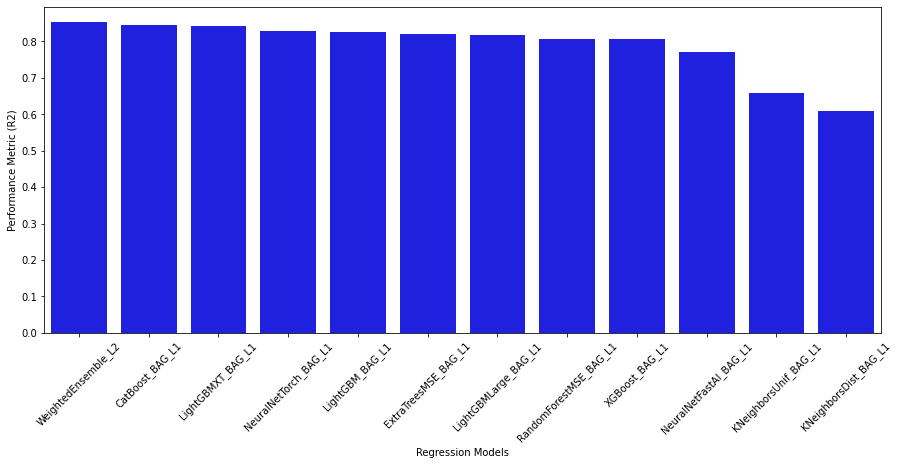

In [17]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [18]:
predictor.evaluate(X_test)

Evaluation: r2 on test data: 0.8796832838307658
Evaluations on test data:
{
    "r2": 0.8796832838307658,
    "root_mean_squared_error": -252.14207259225142,
    "mean_squared_error": -63575.624771116185,
    "mean_absolute_error": -165.6651124500093,
    "pearsonr": 0.94110871220071,
    "median_absolute_error": -104.431884765625
}


{'r2': 0.8796832838307658,
 'root_mean_squared_error': -252.14207259225142,
 'mean_squared_error': -63575.624771116185,
 'mean_absolute_error': -165.6651124500093,
 'pearsonr': 0.94110871220071,
 'median_absolute_error': -104.431884765625}

In [19]:
#looking 5 best models
y_pred=predictor.predict(X_test)
print("predictions:",y_pred)

predictions: 196    2036.697388
187     773.041504
14      206.240158
31      111.388840
390     238.805725
          ...     
566     758.462097
688     406.367065
266    1474.882080
504    2658.903076
239    1670.421265
Name: casual, Length: 147, dtype: float32
